## Our probabilistic graph method to perform node classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import sys
import os
import time

In [2]:
# importar el modelo
sys.path.append(os.path.abspath(".."))
from model import probabilistic_graph_model 

In [3]:
# carpeta donde se toman los datos
carpeta_datos = ".\\Data\\Probabilistic_Inference_data\\"

# carpeta donde se guardan los parametros
parameters_path = ".\\Models\\Our_model\\"

# archivo donde se ponen los hyperparameters
hyperparameters_file = ".\\Models\\Hyperparameters\\Our_model.csv"

# archivo de predicciones
results_file = ".\\Predictions\\"

## Cargar datos

In [4]:
# cargar el grafo
with open(carpeta_datos + "data_graph.json", 'rb') as f:
    graph = pickle.load(f)
    
num_nodos = graph.number_of_nodes()
num_aristas = graph.number_of_edges()

print(f"Se tienen {num_nodos} nodos")
print(f"Se tienen {num_aristas} aristas")

Se tienen 267774 nodos
Se tienen 281288 aristas


In [5]:
# cargar los indices de subjects
with open(carpeta_datos + 'encode_subj_2_idx.pkl', 'rb') as f:
    encode_subj_2_idx = pickle.load(f)
with open(carpeta_datos + 'decode_idx_2_subj.pkl', 'rb') as f:
    decode_idx_2_subj = pickle.load(f)
    
# ver cuantos son
num_clases = len(encode_subj_2_idx) - 1    # poner -1 para no contar el unknow

print(f"Se tienen {num_clases} subjects diferentes (no se cuenta el unknown)")

Se tienen 63 subjects diferentes (no se cuenta el unknown)


In [6]:
# ver que se tiene
graph.nodes()[6974]

{'thesis': 'On Knots, with a Census of the Amphericheirals with Twelve Crossings',
 'indice_subject': 63,
 'division': 'useless'}

## Create model

In [7]:
# provide all information of the grapg
model = probabilistic_graph_model(graph, 
                                 name_atributes_x = 'thesis',
                                 name_label_y = 'indice_subject',
                                 name_division = 'division',
                                 decode_label = decode_idx_2_subj)

# see model information
model.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 267774
Number of edges: 281288
Number of classes: 63

Training nodes:   141345 (52.79%)
Validation nodes: 15705 (5.87%)
Testing nodes:    17451 (6.52%)
Useless nodes:    93273 (34.83%)
----------------------------------------------------------------------------------------------------


## Out degree distribution

Analize zero truncated power law distribution
For the out distribution


Label: 46 (68—Computer science)
Sample of size 29747

Estimated parameters:
beta = 0.8414966215080513
kappa = 0.9870964491622337
lamda = 0.07491185343999542
Normalization C = 0.3753635768824773

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[25032.          1642.10158918   768.63574459   477.93376753
   333.81613774   248.49290529   192.58420377   153.46308325
   124.80341523   103.08611959    86.19842509    72.79590573
    61.98294329    53.14040241   395.96535731]
Observed values in cells
[25032, 1643, 787, 449, 321, 267, 184, 145, 138, 123, 85, 71, 70, 48, 384]


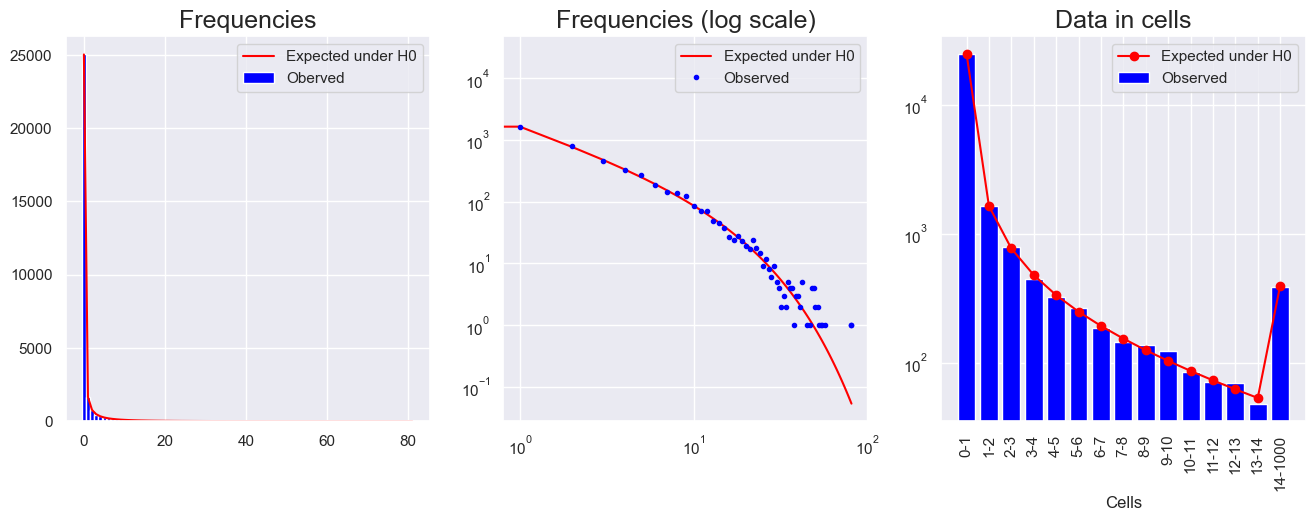


Chi square test 

Statistic T = 12.10966617224831
p-value = 0.355456699921547
The distribution is zero truncated power law
----------------------------------------------------------------------------------------------------


In [8]:
# individual example
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [46],
                                number_cells = 15,
                                show_ind_results = True)

Analize zero truncated power law distribution
For the out distribution


Label: 21 (32—Several complex variables and analytic spaces)
Sample of size 735

Estimated parameters:
beta = 0.7931972789115647
kappa = 0.7421691118931448
lamda = 0.15043547790090125
Normalization C = 0.408865365114254

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[583.          53.46759049  27.50059882  17.51133915  12.16915409
   8.87163109   6.66659851   5.11546554   3.98576816   3.14206318
   2.4998953    2.00386357   1.61617859   1.31025761   6.13959589]

Expected values not valid
Reduce k to 14

New Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 1000]]

New expecteed values in cells
[583.          53.46759049  27.50059882  17.51133915  12.16915409
   8.87163109   6.66659851   5.11546554   3.98576816   3.1420631

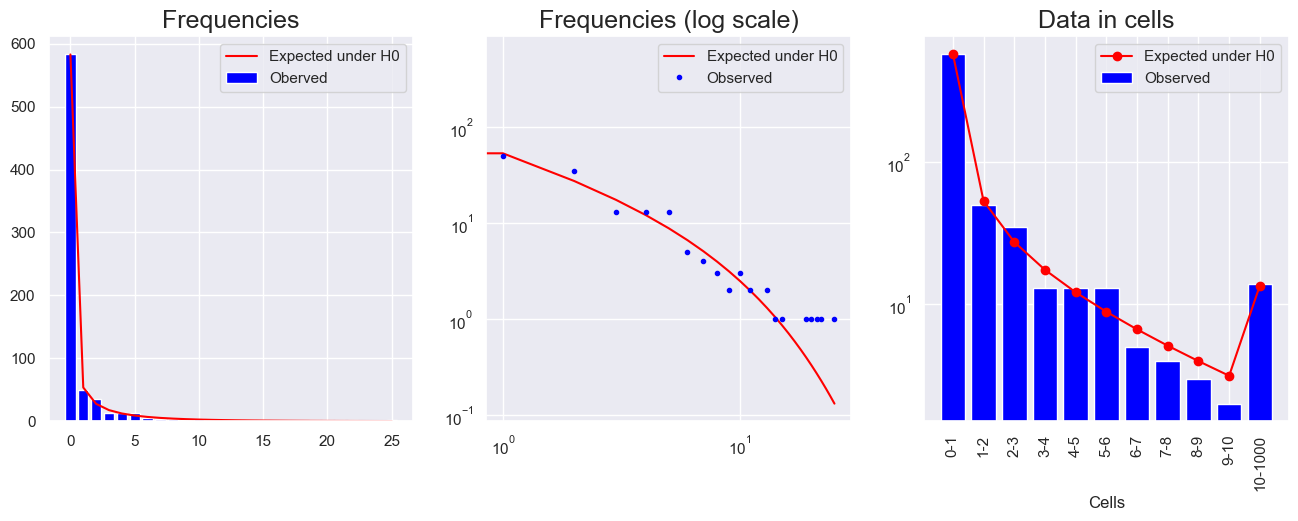


Chi square test 

Statistic T = 6.742466716271725
p-value = 0.4561776948129649
The distribution is zero truncated power law
----------------------------------------------------------------------------------------------------


In [9]:
# individual example where the number of cells is reduced
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [21],
                                number_cells = 15,
                                show_ind_results = True)

Analize zero truncated power law distribution
For the out distribution



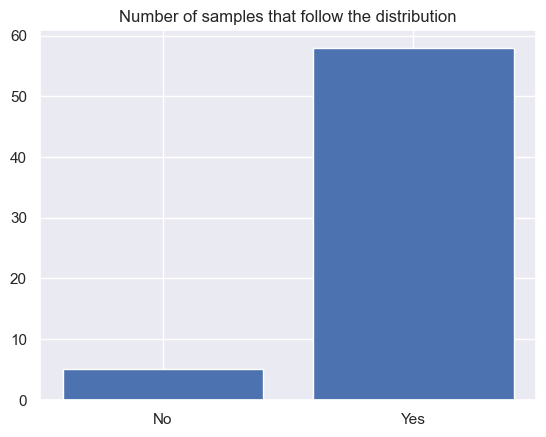


Yes : 58 (92.06349206349206)
No : 5 (7.936507936507937)

Unsuccessful labels:
Label: 0 (00—General)
Label: 35 (49—Calculus of variations and optimal control)
Label: 49 (76—Fluid mechanics)
Label: 58 (91—Game theory, economics, social and behavioral sciences)
Label: 60 (93—Systems theory; control)


In [10]:
# all samples
model.analize_zero_truncated_pw(mode = "out", 
                                number_cells = 15,
                                show_ind_results = False)

Analize zero truncated power law distribution
For the out distribution


Label: 58 (91—Game theory, economics, social and behavioral sciences)
Sample of size 19205

Estimated parameters:
beta = 0.7493361103879198
kappa = 1.5242703710269134
lamda = 0.03147813414988923
Normalization C = 0.5022278949999848

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[14391.          2342.8049709    789.24938779   412.22353662
   257.64492398   177.67803769   130.39752305    99.89725484
    78.97458775    63.95084882    52.77506127    44.22464166
    37.53129579    32.19110839   294.45682145]
Observed values in cells
[14391, 2422, 743, 370, 228, 161, 121, 97, 77, 74, 57, 48, 40, 35, 341]


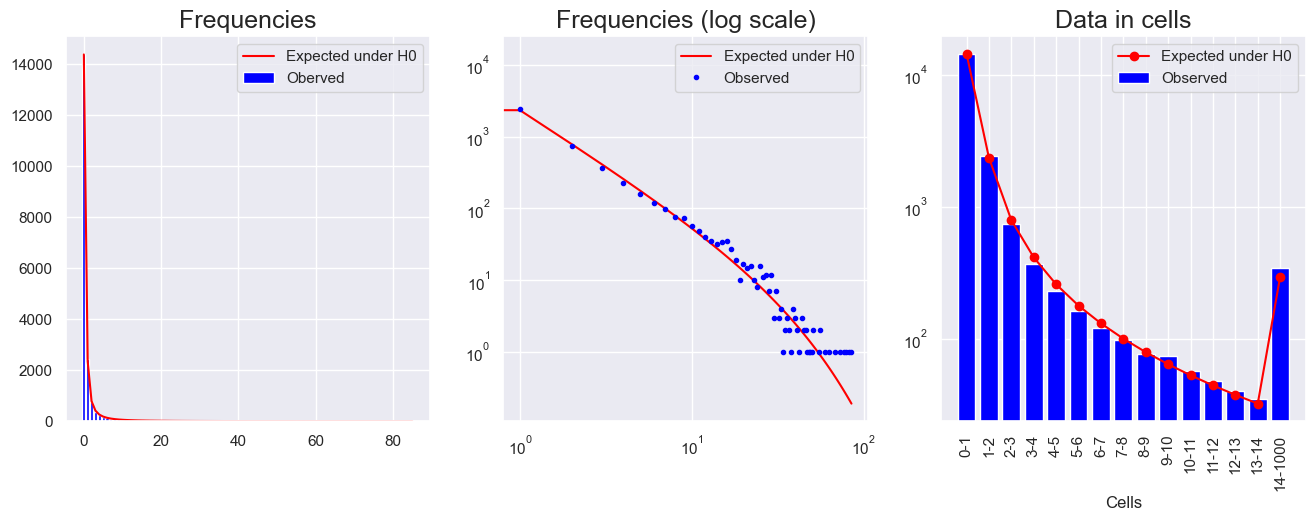


Chi square test 

Statistic T = 25.503240842636597
p-value = 0.007688845762399588
The distribution is NOT zero truncated power law
----------------------------------------------------------------------------------------------------


In [11]:
# see an unsuccessful example
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [58],
                                number_cells = 15,
                                show_ind_results = True)

## Classification

Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.4080425690211774, 'f1_weighted': 0.6237028020610783, 'f1_micro': 0.6141992995861191}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  9%|██████▎                                                                  | 10930/126429 [00:04<00:46, 2490.19it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:49<00:00, 2544.66it/s]


{'f1_macro': 0.5361580133161385, 'f1_weighted': 0.7208746265940658, 'f1_micro': 0.7188793377905126}

In validation nodes
Inference on interation 1 is 71% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10833/126429 [00:04<00:46, 2464.63it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:51<00:00, 2432.37it/s]


{'f1_macro': 0.5250246833288507, 'f1_weighted': 0.7233707182080957, 'f1_micro': 0.731932505571474}

In validation nodes
Inference on interation 1 is 70% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 91% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  9%|██████▏                                                                  | 10805/126429 [00:04<00:47, 2412.79it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:54<00:00, 2340.63it/s]


{'f1_macro': 0.5440864623170693, 'f1_weighted': 0.7307546215087002, 'f1_micro': 0.728748806112703}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10829/126429 [00:05<00:49, 2326.27it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:50<00:00, 2497.26it/s]


{'f1_macro': 0.5332012288232496, 'f1_weighted': 0.7336416748635284, 'f1_micro': 0.7425660617637695}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 91% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  9%|██████▎                                                                  | 10951/126429 [00:04<00:55, 2088.04it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:51<00:00, 2435.74it/s]


{'f1_macro': 0.5465711091267377, 'f1_weighted': 0.7338299451961422, 'f1_micro': 0.731932505571474}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration

Inference using MAP


  9%|██████▏                                                                  | 10821/126429 [00:05<00:46, 2486.33it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:54<00:00, 2301.27it/s]


{'f1_macro': 0.5336901400924523, 'f1_weighted': 0.7374891909162207, 'f1_micro': 0.7467685450493473}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  9%|██████▎                                                                  | 10937/126429 [00:04<00:48, 2381.89it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:50<00:00, 2487.10it/s]


{'f1_macro': 0.5470927663377123, 'f1_weighted': 0.7341870487926752, 'f1_micro': 0.7323145495065266}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10903/126429 [00:04<00:48, 2379.85it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:49<00:00, 2568.66it/s]


{'f1_macro': 0.532925922899975, 'f1_weighted': 0.7370816517017656, 'f1_micro': 0.7464501751034702}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  9%|██████▏                                                                  | 10762/126429 [00:04<00:44, 2577.79it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:48<00:00, 2591.65it/s]


{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration

Inference using MAP


  9%|██████▏                                                                  | 10818/126429 [00:04<00:44, 2611.93it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:48<00:00, 2599.76it/s]


{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  9%|██████▎                                                                  | 10898/126429 [00:04<00:45, 2563.49it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:50<00:00, 2496.58it/s]


{'f1_macro': 0.5466525821150249, 'f1_weighted': 0.7343338705589901, 'f1_micro': 0.7325055714740528}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10952/126429 [00:04<00:46, 2465.18it/s]C:\Users\diego\Downloads\A Probabilistic Model for Node Classification in Directed Graphs\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:50<00:00, 2497.99it/s]


{'f1_macro': 0.533383132014408, 'f1_weighted': 0.7373454382788547, 'f1_micro': 0.7467685450493473}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 90% equal

Analize statistics of results in 15705 validation nodes


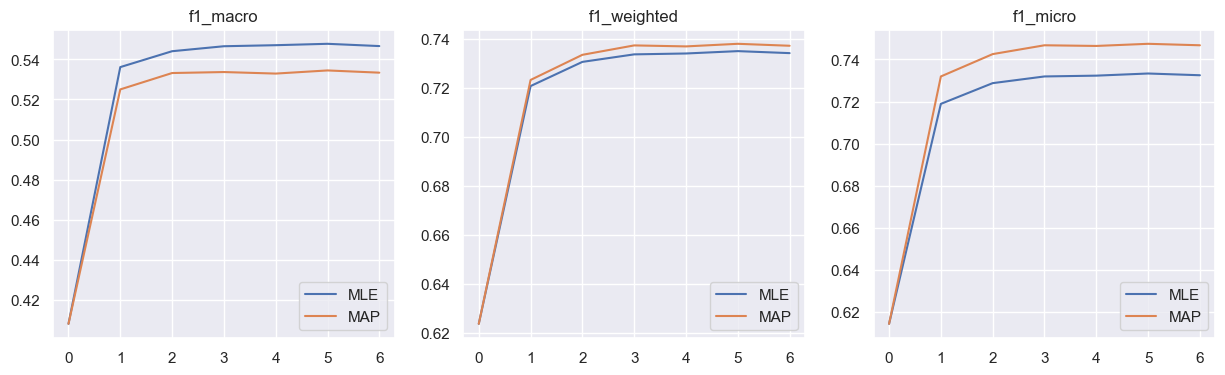

MLE achieves the best f1_macro 0.54778 in iteration 5
MAP achieves the best f1_macro 0.53449 in iteracion 5
Mejor desempeño MLE
{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}
Mejor desempeño MAP
{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}


In [12]:
# set hyperparameters
config = {
    
    "Vectorizer" : "tfidf",  # count tfidf
    "Ngram_range": (1, 2),  # (1, 1) , (1, 2)
    "Min_df": 2,
    "Max_df": 0.5,
    "Max_features": None, # None, 10000, 3000000
    "alpha_omega": 0.035,
    
    "alpha_pi" : 0,
    "alhpa_Theta": 1,
    "alpha_Xi" : 1,
    
    "D_in_max" : 10,
    "psi_dist": "additive_smoothing",           # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_psi": 0.1,                           # en caso de hacer additive_smoothing
    
    "D_out_max": 200,
    "phi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_phi": 2,                            # en caso de hacer additive_smoothing
    
    "method_iteration_0": "near",            # text, random, near
    "num_iterations": 6,
    "Metric" : "f1_macro", 
}

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)

model.probabilistic_inference_complete(config,
                                       folder_parameters = parameters_path,
                                       prediction_path = results_file,
                                       hyperparameters_file = hyperparameters_file)


## Evaluate

In [13]:
# validation data
print("ML")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_map_,
                                     metodo = "map"))

ML
{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}

MAP
{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}


In [14]:
# test data
print("ML")
print(model.evaluate_test_nodes(iteration = model.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model.evaluate_test_nodes(iteration = model.best_iter_map_,
                                method = "map"))

ML
{'f1_macro': 0.5705175461408549, 'f1_weighted': 0.7380058006453525, 'f1_micro': 0.736175577330812}

MAP
{'f1_macro': 0.5494960384751082, 'f1_weighted': 0.7373526281478104, 'f1_micro': 0.7463182625637499}


## Prediction example

In [15]:
# ver ejemplo
model.see_example_prediction(node_v = 153133, iteration = model.best_iter_map_,
                             method = "map", num_top_labels = 5)

Prediction of node 153133 in iteration 5 using map

test node
True label: 38 (53—Differential geometry)

--------------------------------------------------
Information of node 153133:
Text atributes: Geometric objects in differential geometry

In Degree: 1
Predecesors: [29747]
	29747 - not training node. Unknown label
Out Degree: 2
Successors: [153134, 153140]
	153134 - training node. Known label: 36
	153140 - training node. Known label: 36
--------------------------------------------------

Predict label of 153133 in iteration 5
Use map predictions on iteration 4 for the neihboors of 153133

Predecesors: [29747]
	29747 - not training node. map prediction on iteration 4: 38
Successors: [153134, 153140]
	153134 - training node. Known label: 36
	153140 - training node. Known label: 36

Vector p_v:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vector s_v:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [16]:
# ver ejemplo
model.see_example_prediction(node_v = 12408, iteration = model.best_iter_map_,
                             method = "map", num_top_labels = 5)

Prediction of node 12408 in iteration 5 using map

test node
True label: 41 (57—Manifolds and cell complexes)

--------------------------------------------------
Information of node 12408:
Text atributes: On Topological Vector Fields

In Degree: 2
Predecesors: [8405, 5408]
	8405 - not training node. Unknown label
	5408 - not training node. Unknown label
Out Degree: 12
Successors: [17748, 19912, 19938, 20062, 20101, 20225, 38362, 67788, 73247, 93054, 98775, 145675]
	17748 - not training node. Unknown label
	19912 - not training node. Unknown label
	19938 - not training node. Unknown label
	20062 - not training node. Unknown label
	20101 - not training node. Unknown label
	20225 - not training node. Unknown label
	38362 - not training node. Unknown label
	67788 - training node. Known label: 41
	73247 - training node. Known label: 41
	93054 - training node. Known label: 41
	98775 - training node. Known label: 41
	145675 - training node. Known label: 41
------------------------------------